<a href="https://colab.research.google.com/github/SophiaKim100/NDSRP/blob/main/Olympic_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do Physical Traits Predict Olympic Medal Success?**
Can height, weight, and age be used to predict whether an Olympic athlete will win a medal?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import metrics
from sklearn.preprocessing import *

# **Below: Visualization/Analysis of Recent (last 45 years) Dataset**
General --> includes all seasons, all genders, all ages, all sports

## All Seasons

In [2]:
data = pd.read_csv('/content/athlete_events.csv')
all_df = pd.DataFrame(data)
all_df['Medalist'] = all_df['Medal'].notna().astype(int)
all_df['Season Encoded'] = all_df['Season'].map({'Summer': 1, 'Winter': 0})
all_df.drop(['Name', 'Team', 'NOC', 'Games', 'City', 'Event', 'Medal', 'Season'], axis = 1, inplace = True)
all_df = all_df[all_df['Year'] >= 1980]
all_df.drop_duplicates(inplace = True)
all_df.dropna(subset=['ID','Age', 'Sex','Height', 'Weight', 'Sport', 'Year', 'Season Encoded'], inplace=True)
all_df.head()

,ID,Sex,Age,Height,Weight,Year,Sport,Medalist,Season Encoded
0,1,M,24.0,180.0,80.0,1992,Basketball,0,1
1,2,M,23.0,170.0,60.0,2012,Judo,0,1
4,5,F,21.0,185.0,82.0,1988,Speed Skating,0,0
6,5,F,25.0,185.0,82.0,1992,Speed Skating,0,0
8,5,F,27.0,185.0,82.0,1994,Speed Skating,0,0


### **Visualizations**

In [ ]:
all_grouped_height = all_df.groupby('Medalist')[['Height']].describe()
all_grouped_height

Height                                                          
            count        mean        std    min    25%    50%    75%    max
Medalist                                                                   
0         92248.0  176.507133  10.547702  127.0  169.0  177.0  183.0  226.0
1         19213.0  178.168428  11.294090  136.0  170.0  178.0  185.0  223.0

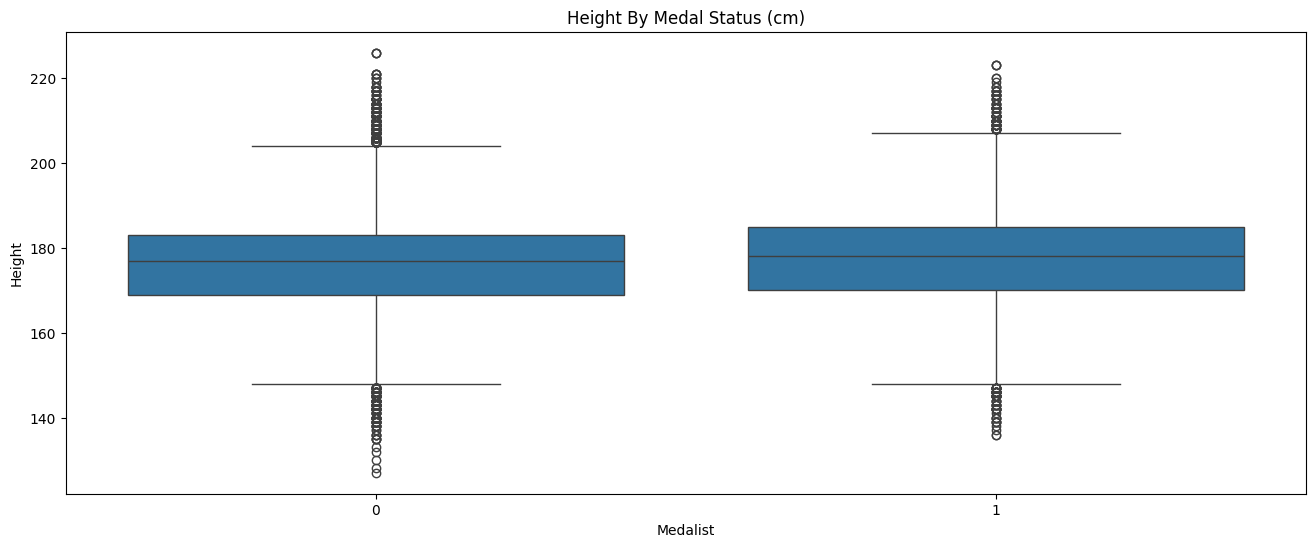

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Height', x='Medalist', data=all_df)
plt.title("Height By Medal Status (cm)")
plt.show()

In [ ]:
all_grouped_weight = all_df.groupby('Medalist')[['Weight']].describe()
all_grouped_weight

Weight                                                     
            count       mean        std   min   25%   50%   75%    max
Medalist                                                              
0         92248.0  72.017935  15.220753  25.0  61.0  70.0  81.0  214.0
1         19213.0  74.381486  15.647860  28.0  63.0  73.0  84.0  175.0

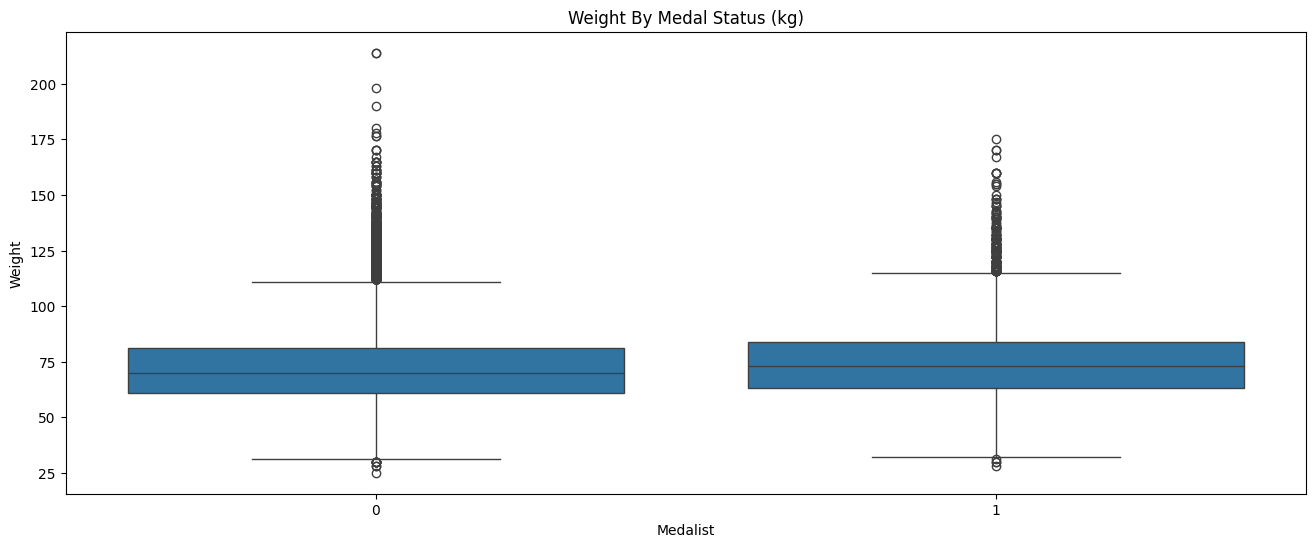

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Weight', x='Medalist', data=all_df)
plt.title("Weight By Medal Status (kg)")
plt.show()

In [ ]:
all_grouped_age = all_df.groupby('Medalist')[['Age']].describe()
all_grouped_age

Age                                                   
            count       mean       std   min   25%   50%   75%   max
Medalist                                                            
0         92248.0  25.571449  5.347983  12.0  22.0  25.0  28.0  71.0
1         19213.0  25.780930  4.941659  13.0  22.0  25.0  28.0  61.0

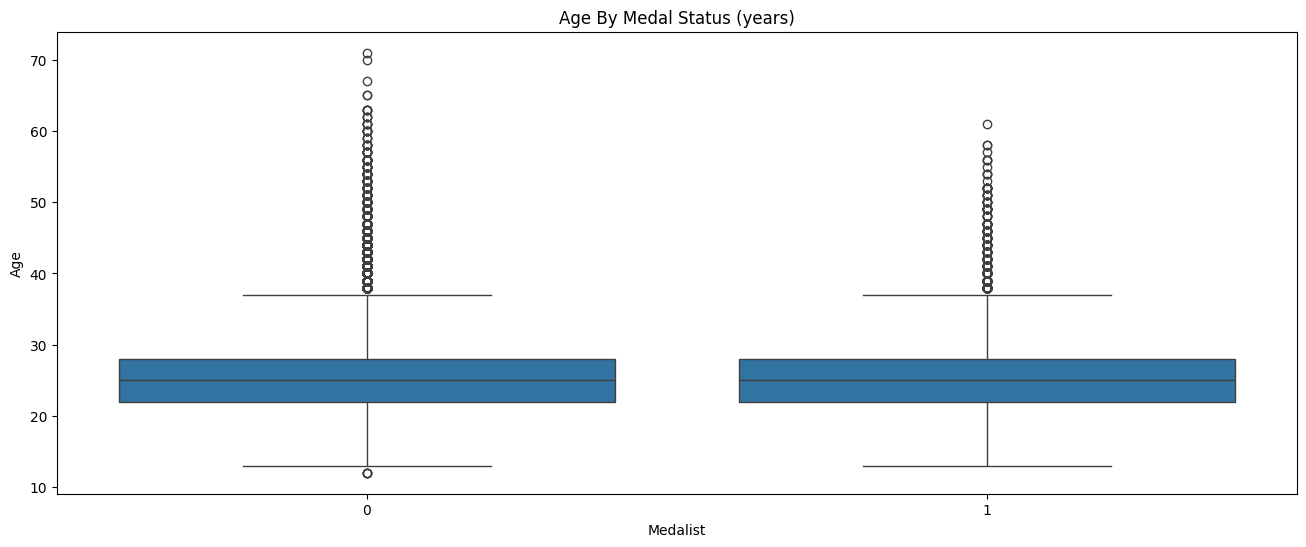

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Age', x='Medalist', data=all_df)
plt.title("Age By Medal Status (years)")
plt.show()

In [ ]:
all_medalists_df = all_df[all_df['Medalist'] == 1]
all_non_medalists_df = all_df[all_df['Medalist'] == 0]

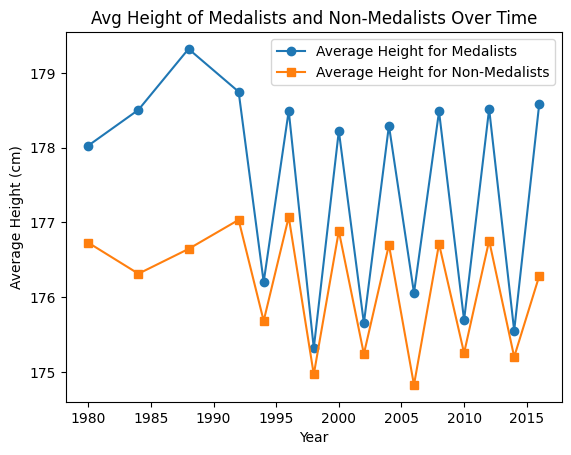

In [ ]:
yearly_avg_height_medalists = all_medalists_df.groupby('Year')[['Height']].mean().reset_index()
yearly_avg_height_non_medalists = all_non_medalists_df.groupby('Year')[['Height']].mean().reset_index()

plt.plot(yearly_avg_height_medalists['Year'], yearly_avg_height_medalists['Height'], label = 'Average Height for Medalists', marker='o')
plt.plot(yearly_avg_height_non_medalists['Year'], yearly_avg_height_non_medalists['Height'], label = 'Average Height for Non-Medalists', marker='s')

plt.title('Avg Height of Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Average Height (cm)')
plt.legend()
plt.show()


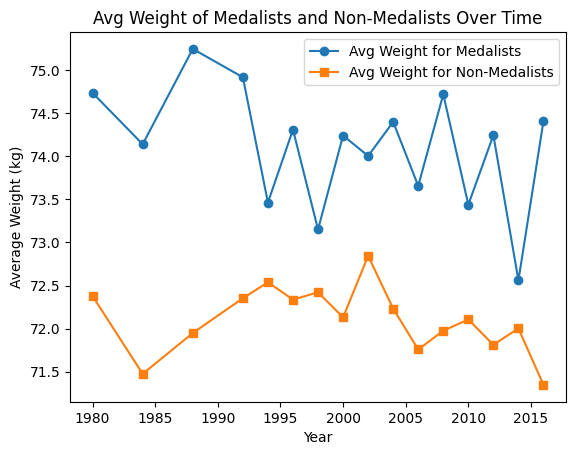

In [ ]:
yearly_avg_weight_medalists = all_medalists_df.groupby('Year')[['Weight']].mean().reset_index()
yearly_avg_weight_non_medalists = all_non_medalists_df.groupby('Year')[['Weight']].mean().reset_index()

plt.plot(yearly_avg_weight_medalists['Year'], yearly_avg_weight_medalists['Weight'], label = 'Avg Weight for Medalists', marker='o')
plt.plot(yearly_avg_weight_non_medalists['Year'], yearly_avg_weight_non_medalists['Weight'], label = 'Avg Weight for Non-Medalists', marker='s')

plt.title('Avg Weight of Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Average Weight (kg)')
plt.legend()
plt.show()

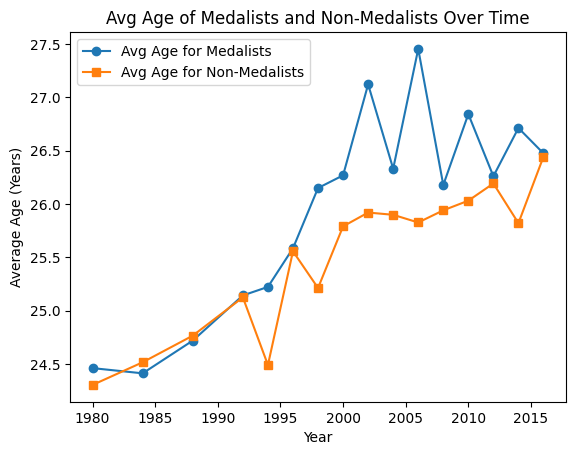

In [ ]:
yearly_avg_age_medalists = all_medalists_df.groupby('Year')[['Age']].mean().reset_index()
yearly_avg_age_non_medalists = all_non_medalists_df.groupby('Year')[['Age']].mean().reset_index()

plt.plot(yearly_avg_age_medalists['Year'], yearly_avg_age_medalists['Age'], label = 'Avg Age for Medalists', marker='o')
plt.plot(yearly_avg_age_non_medalists['Year'], yearly_avg_age_non_medalists['Age'], label = 'Avg Age for Non-Medalists', marker='s')

plt.title('Avg Age of Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Average Age (Years)')
plt.legend()
plt.show()

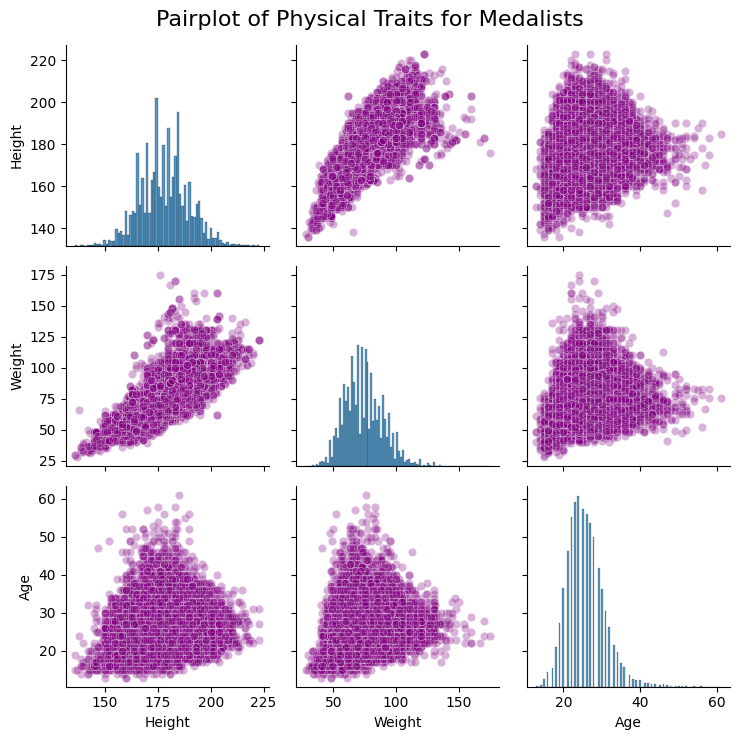

In [ ]:
sns.pairplot(all_medalists_df[['Height', 'Weight', 'Age']],  diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for Medalists", fontsize=16)
plt.tight_layout()
plt.show()

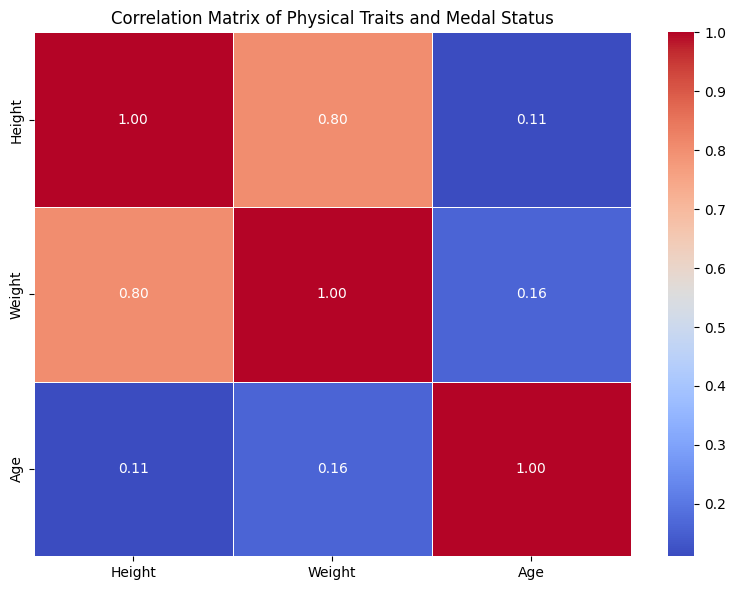

In [ ]:
# Select numeric columns for correlation
all_traits = all_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = all_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits and Medal Status")
plt.tight_layout()
plt.show()

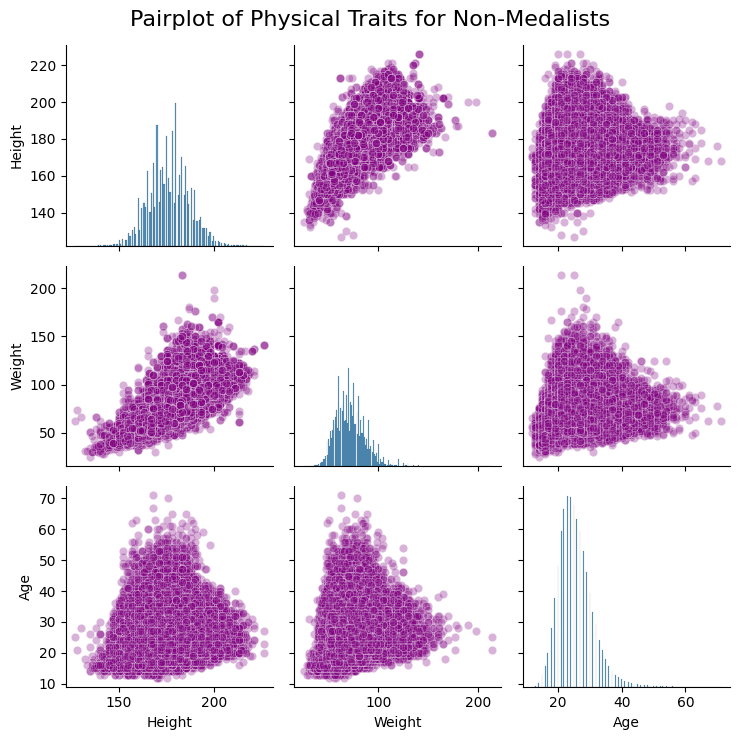

In [ ]:
sns.pairplot(all_non_medalists_df[['Height', 'Weight', 'Age']],diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'} )
plt.suptitle("Pairplot of Physical Traits for Non-Medalists", fontsize=16)
plt.tight_layout()
plt.show()

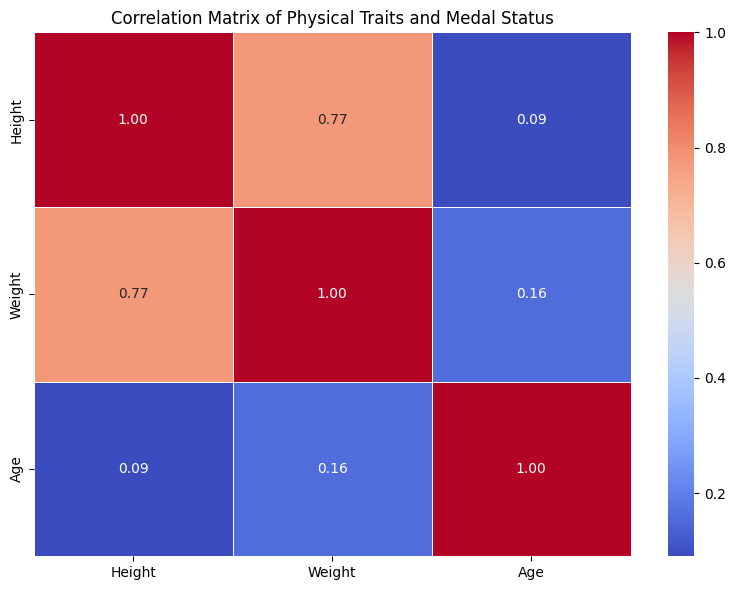

In [ ]:
# Select numeric columns for correlation
all_traits2 = all_non_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = all_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits and Medal Status")
plt.tight_layout()
plt.show()

### **Encode & Feature Prep**

In [ ]:
features = all_df[['Height', 'Age', 'Weight','Season Encoded']]
label = all_df['Medalist']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 42)

In [ ]:
#create a standardized version of the training and testing data
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [ ]:
#create a normalized version of the training and testing data
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

### Unscaled Data Test

In [ ]:
#test on unscaled training data
model_unscaled = KNeighborsClassifier(n_neighbors=5)
model_unscaled.fit(X_train, y_train)
pred_unscaled = model_unscaled.predict(X_test)
print(accuracy_score(y_test, pred_unscaled))

0.7978289149060244


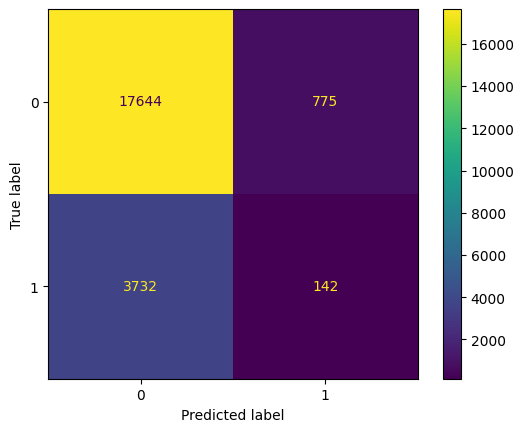

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_unscaled, display_labels = model_unscaled.classes_)
plt.show()

/tmp/ipython-input-153-2725526517.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


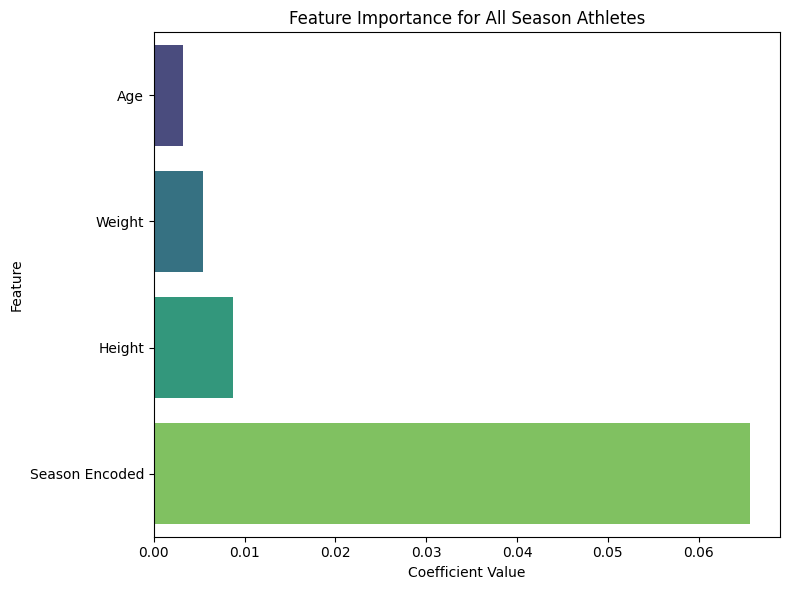

In [ ]:
# Train logistic regression
lr_model1 = LogisticRegression(max_iter=1000)
lr_model1.fit(X_train, y_train)

# Extract coefficients
coeffs = lr_model1.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Season Athletes")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Standaradized Data Test

In [ ]:
#Test on standardized training data
model_std = KNeighborsClassifier(n_neighbors=5)
X_scaled = std_scaler.fit_transform(features)
model_std.fit(X_train_std, y_train)
pred_std =  model_std.predict(X_test_std)
print(accuracy_score(y_test, pred_std))

0.7994886287175347


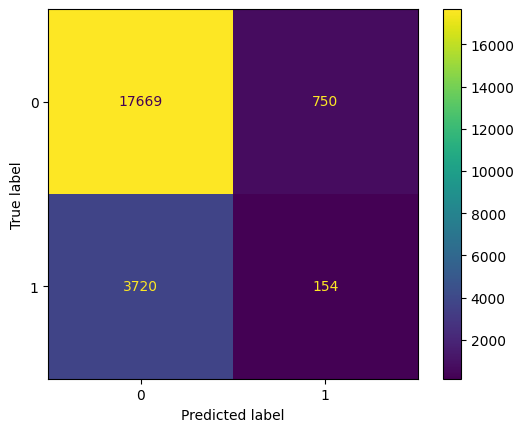

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_std, display_labels = model_std.classes_)
plt.show()

/tmp/ipython-input-170-2062751087.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


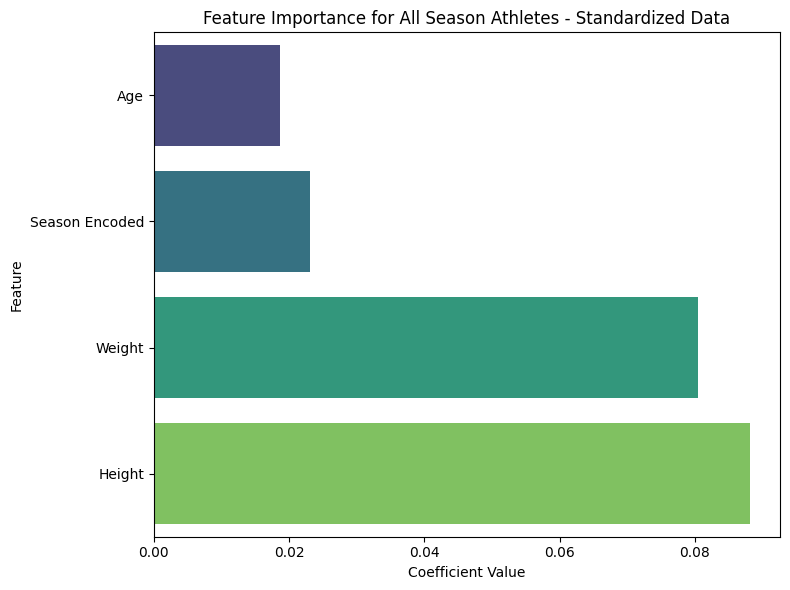

In [ ]:
# Train logistic regression
lr_model2 = LogisticRegression(max_iter=1000)
lr_model2.fit(X_scaled, label)

# Extract coefficients
coeffs = lr_model2.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Season Athletes - Standardized Data")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Normalized Data Test

In [ ]:
#Test on normalized data
model_norm = KNeighborsClassifier(n_neighbors=5)
X_norm = norm_scaler.fit_transform(features)
model_norm.fit(X_train_norm, y_train)
pred_norm = model_norm.predict(X_test_norm)
print(accuracy_score(y_test, pred_norm))

0.7991746288072489


In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_norm, display_labels = model_norm.classes_)
plt.show()

/tmp/ipython-input-173-3230799002.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


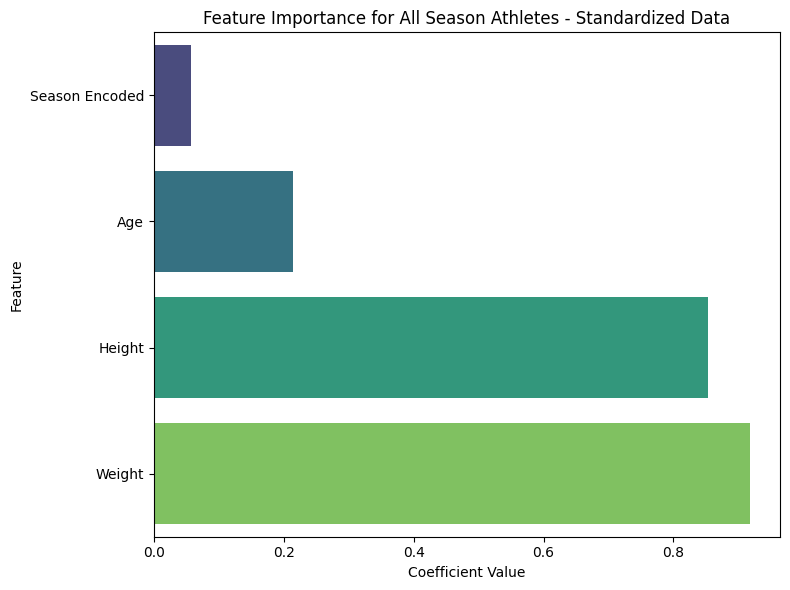

In [ ]:
# Train logistic regression
lr_model3 = LogisticRegression(max_iter=1000)
lr_model3.fit(X_norm, label)

# Extract coefficients
coeffs = lr_model3.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Season Athletes - Standardized Data")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Analysis

## Winter Season

In [4]:
all_winter_df = all_df[all_df['Season Encoded'] == 0]
all_winter_df.reset_index(drop=True, inplace=True)
all_winter_df.head()

,ID,Sex,Age,Height,Weight,Year,Sport,Medalist,Season Encoded
0,5,F,21.0,185.0,82.0,1988,Speed Skating,0,0
1,5,F,25.0,185.0,82.0,1992,Speed Skating,0,0
2,5,F,27.0,185.0,82.0,1994,Speed Skating,0,0
3,6,M,31.0,188.0,75.0,1992,Cross Country Skiing,0,0
4,6,M,33.0,188.0,75.0,1994,Cross Country Skiing,0,0


### Visualization

In [ ]:
aw_grouped_height = all_winter_df.groupby('Medalist')[['Height']].describe()
aw_grouped_height

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Height', x='Medalist', data=all_winter_df)
plt.title("Height By Medal Status for All Athletes (cm)")
plt.show()

In [ ]:
aw_grouped_weight = all_winter_df.groupby('Medalist')[['Weight']].describe()
aw_grouped_weight

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Weight', x='Medalist', data=all_winter_df)
plt.title("Weight By Medal Status for All Athletes (kg)")
plt.show()

In [ ]:
aw_grouped_age = all_winter_df.groupby('Medalist')[['Age']].describe()
aw_grouped_age

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Age', x='Medalist', data=all_winter_df)
plt.title("Age By Medal Status for All Athletes (years)")
plt.show()

In [41]:
all_winter_medalists = all_winter_df[all_winter_df['Medalist'] == 1]
all_winter_non_medalists = all_winter_df[all_winter_df['Medalist'] == 0]

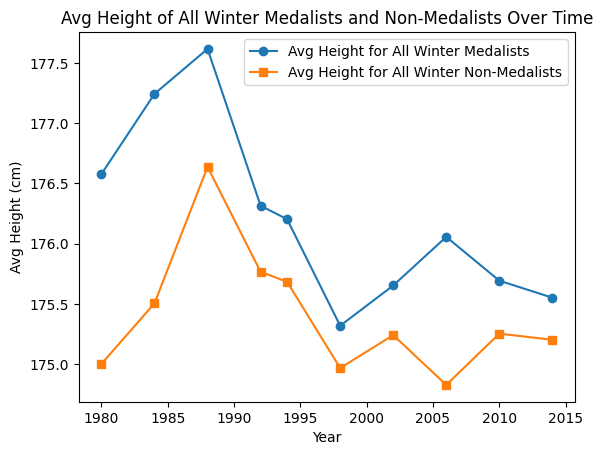

In [42]:
aw_yearly_avg_height_medalists = all_winter_medalists.groupby('Year')[['Height']].mean().reset_index()
aw_yearly_avg_height_non_medalists = all_winter_non_medalists.groupby('Year')[['Height']].mean().reset_index()

plt.plot(aw_yearly_avg_height_medalists['Year'], aw_yearly_avg_height_medalists['Height'], label = 'Avg Height for All Winter Medalists', marker='o')
plt.plot(aw_yearly_avg_height_non_medalists['Year'], aw_yearly_avg_height_non_medalists['Height'], label = 'Avg Height for All Winter Non-Medalists', marker='s')

plt.title('Avg Height of All Winter Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Height (cm)')
plt.legend()
plt.show()

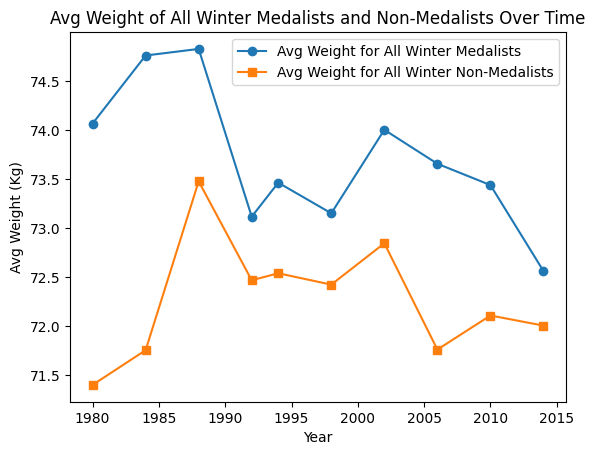

In [43]:
aw_yearly_avg_weight_medalists = all_winter_medalists.groupby('Year')[['Weight']].mean().reset_index()
aw_yearly_avg_weight_non_medalists = all_winter_non_medalists.groupby('Year')[['Weight']].mean().reset_index()

plt.plot(aw_yearly_avg_weight_medalists['Year'], aw_yearly_avg_weight_medalists['Weight'], label = 'Avg Weight for All Winter Medalists', marker='o')
plt.plot(aw_yearly_avg_weight_non_medalists['Year'], aw_yearly_avg_weight_non_medalists['Weight'], label = "Avg Weight for All Winter Non-Medalists", marker = 's')

plt.title('Avg Weight of All Winter Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Weight (Kg)')
plt.legend()
plt.show()

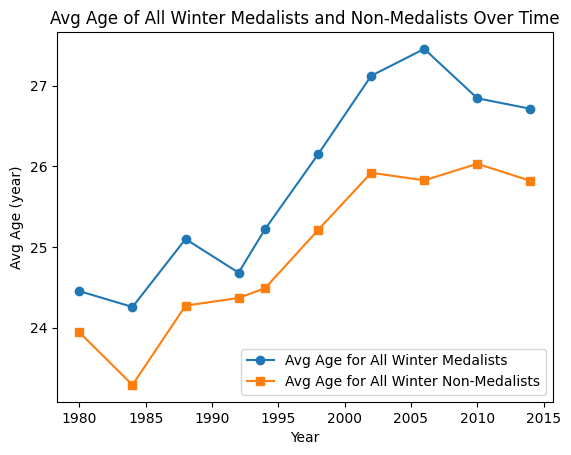

In [44]:
aw_yearly_avg_age_medalists = all_winter_medalists.groupby('Year')[['Age']].mean().reset_index()
aw_yearly_avg_age_non_medalists = all_winter_non_medalists.groupby('Year')[['Age']].mean().reset_index()

plt.plot(aw_yearly_avg_age_medalists['Year'], aw_yearly_avg_age_medalists['Age'], label = 'Avg Age for All Winter Medalists', marker='o')
plt.plot(aw_yearly_avg_age_non_medalists['Year'], aw_yearly_avg_age_non_medalists['Age'], label = "Avg Age for All Winter Non-Medalists", marker = 's')

plt.title('Avg Age of All Winter Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Age (year)')
plt.legend()
plt.show()

In [ ]:
sns.pairplot(all_winter_medalists[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for All Winter Medalists")
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
aw_traits = all_winter_medalists[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = aw_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits for All Winter Medalists")
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(all_winter_non_medalists[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for All Winter Non-Medalists")
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
aw_traits2 = all_winter_non_medalists[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = aw_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits for All Winter Non-Medalists")
plt.tight_layout()
plt.show()

### Feature Prep & Predictions

In [5]:
aw_features = all_winter_df[['Height', 'Age', 'Weight']]
aw_label = all_winter_df['Medalist']

In [7]:
X_test_aw, X_train_aw, y_test_aw, y_train_aw = train_test_split(aw_features, aw_label, test_size=0.2, random_state=42)

In [8]:
std_scaler = StandardScaler()
X_train_aw_std = std_scaler.fit_transform(X_train_aw)
X_test_aw_std = std_scaler.transform(X_test_aw)

In [9]:
norm_scaler = MinMaxScaler()
X_train_aw_norm = norm_scaler.fit_transform(X_train_aw)
X_test_aw_norm = norm_scaler.transform(X_test_aw)

###Unscaled Data Test

In [10]:
model_unscaled_aw = KNeighborsClassifier(n_neighbors=5)
model_unscaled_aw.fit(X_train_aw, y_train_aw)
pred_unscaled_aw = model_unscaled_aw.predict(X_test_aw)
print(accuracy_score(y_test_aw, pred_unscaled_aw))

0.8130241423125795


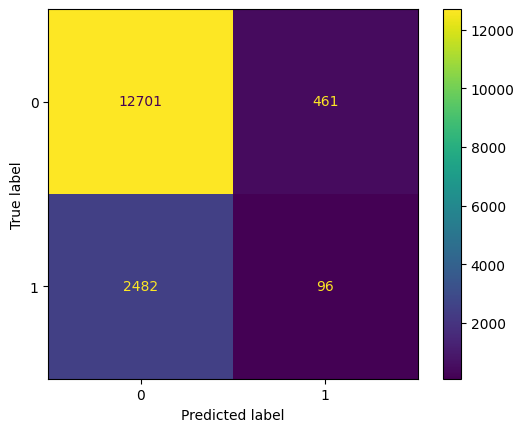

In [11]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_aw, pred_unscaled_aw, display_labels = model_unscaled_aw.classes_)
plt.show()

/tmp/ipython-input-13-4273629131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


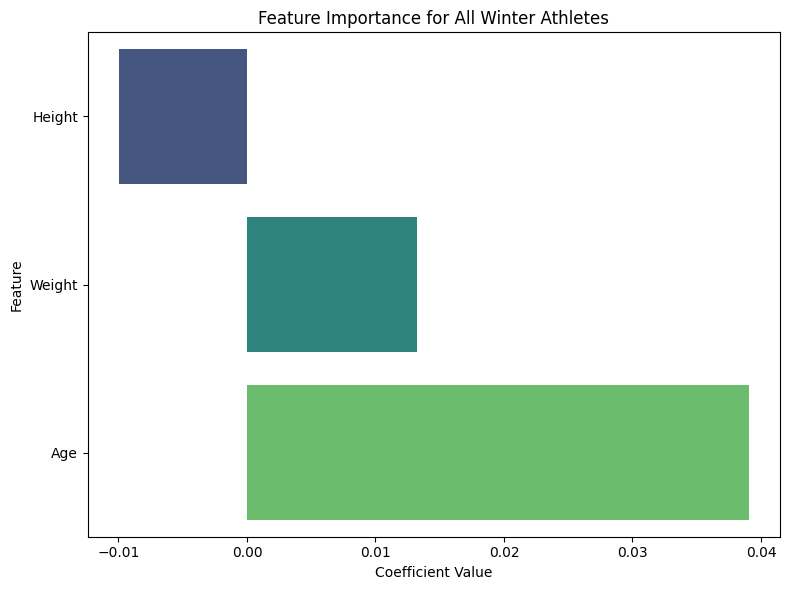

In [13]:
# Train logistic regression
lr_model4 = LogisticRegression(max_iter=1000)
lr_model4.fit(X_train_aw, y_train_aw)

# Extract coefficients
coeffs = lr_model4.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_aw.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Winter Athletes")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Standardized Data Test

In [19]:
model_std_aw = KNeighborsClassifier(n_neighbors=5)
model_std_aw.fit(X_train_aw_std, y_train_aw)
pred_std_aw = model_std_aw.predict(X_test_aw_std)
print(accuracy_score(y_test_aw, pred_std_aw))

0.8119440914866582


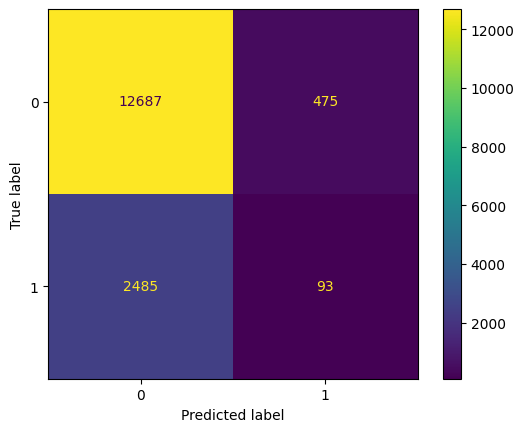

In [20]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_aw, pred_std_aw, display_labels = model_std_aw.classes_)
plt.show()

/tmp/ipython-input-21-3661822010.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


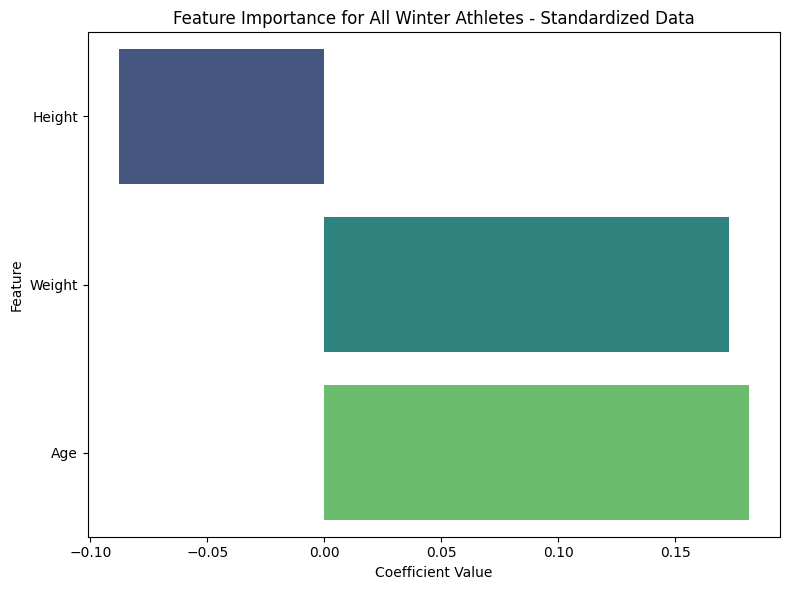

In [21]:
# Train logistic regression
lr_model5 = LogisticRegression(max_iter=1000)
lr_model5.fit(X_train_aw_std, y_train_aw)

# Extract coefficients
coeffs = lr_model5.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_aw.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Winter Athletes - Standardized Data")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Normalized Data Test

In [ ]:
model_norm_aw = KNeighborsClassifier(n_neighbors=5)
model_norm_aw.fit(X_train_aw_norm, y_train_aw)
pred_norm_aw = model_norm_aw.predict(X_test_aw_norm)
print(accuracy_score(y_test_aw, pred_norm_aw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_aw, pred_norm_aw, display_labels = model_norm_aw.classes_)
plt.show()

/tmp/ipython-input-24-1030875604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


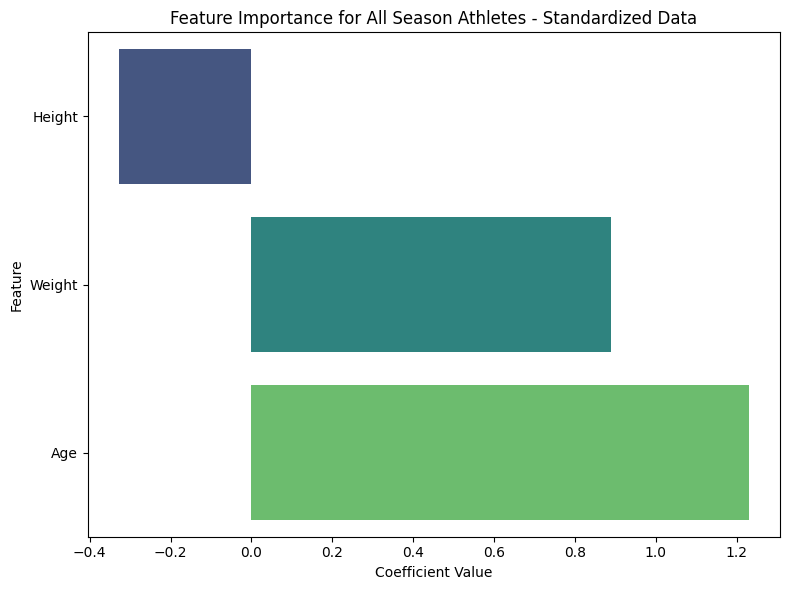

In [24]:
# Train logistic regression
lr_model6 = LogisticRegression(max_iter=1000)
lr_model6.fit(X_train_aw_norm, y_train_aw)

# Extract coefficients
coeffs = lr_model6.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_aw.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Season Athletes - Standardized Data")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Analysis

## Summer Season

In [32]:
all_summer_df = all_df[all_df['Season Encoded'] == 1]
all_summer_df.reset_index(drop=True, inplace=True)
all_summer_df.head()

,ID,Sex,Age,Height,Weight,Year,Sport,Medalist,Season Encoded
0,1,M,24.0,180.0,80.0,1992,Basketball,0,1
1,2,M,23.0,170.0,60.0,2012,Judo,0,1
2,12,M,31.0,172.0,70.0,2000,Badminton,0,1
3,13,F,30.0,159.0,55.5,1996,Sailing,0,1
4,13,F,34.0,159.0,55.5,2000,Sailing,0,1


### Visualization

In [33]:
as_grouped_height = all_summer_df.groupby('Medalist')[['Height']].describe()
as_grouped_height

Height                                                          
            count        mean        std    min    25%    50%    75%    max
Medalist                                                                   
0         75788.0  176.764277  10.860394  127.0  169.0  177.0  184.0  226.0
1         15997.0  178.600363  11.674730  136.0  170.0  178.0  186.0  223.0

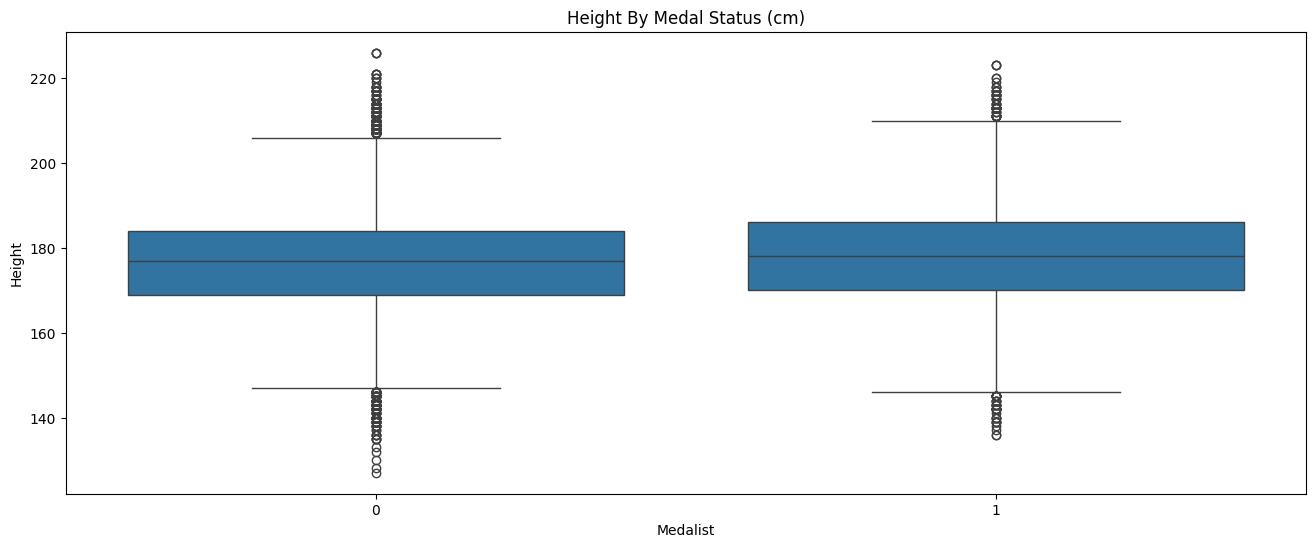

In [34]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Medalist', y='Height', data=all_summer_df)
plt.title("Height By Medal Status for All Summer Athletes (cm)")
plt.show()

In [35]:
as_grouped_weight = all_summer_df.groupby('Medalist')[['Weight']].describe()
as_grouped_weight

Weight                                                     
            count       mean        std   min   25%   50%   75%    max
Medalist                                                              
0         75788.0  71.962897  15.619608  25.0  60.0  70.0  80.0  214.0
1         15997.0  74.549416  16.039398  28.0  63.0  73.0  84.0  175.0

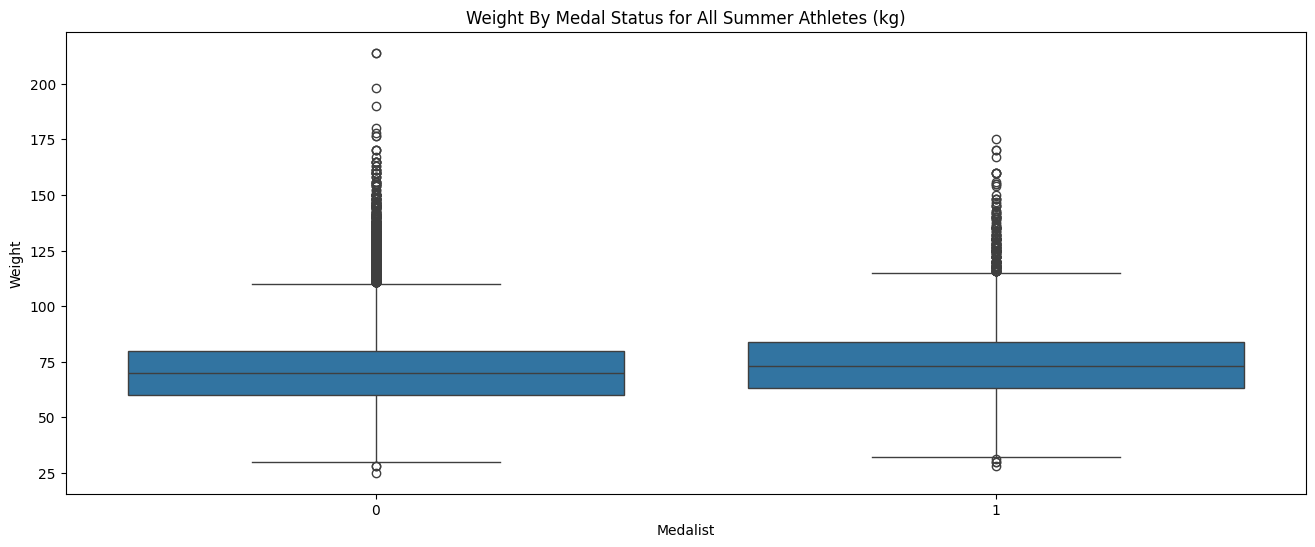

In [36]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Medalist', y='Weight', data = all_summer_df)
plt.title("Weight By Medal Status for All Summer Athletes (kg)")
plt.show()

In [37]:
as_grouped_age = all_summer_df.groupby('Medalist')[['Age']].describe()
as_grouped_age

Age                                                   
            count       mean       std   min   25%   50%   75%   max
Medalist                                                            
0         75788.0  25.649377  5.462523  12.0  22.0  25.0  29.0  71.0
1         15997.0  25.701882  4.975077  13.0  22.0  25.0  28.0  61.0

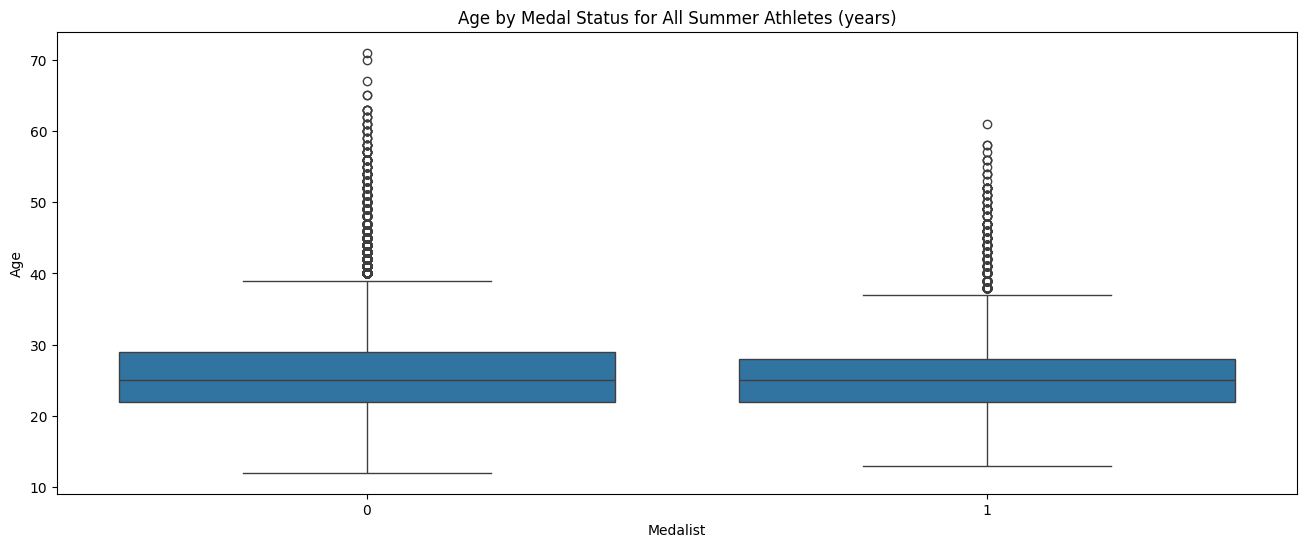

In [38]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Medalist', y='Age', data= all_summer_df)
plt.title("Age by Medal Status for All Summer Athletes (years)")
plt.show()

In [39]:
as_medalists = all_summer_df[all_summer_df['Medalist'] == 1]
as_non_medalists = all_summer_df[all_summer_df['Medalist'] == 0]

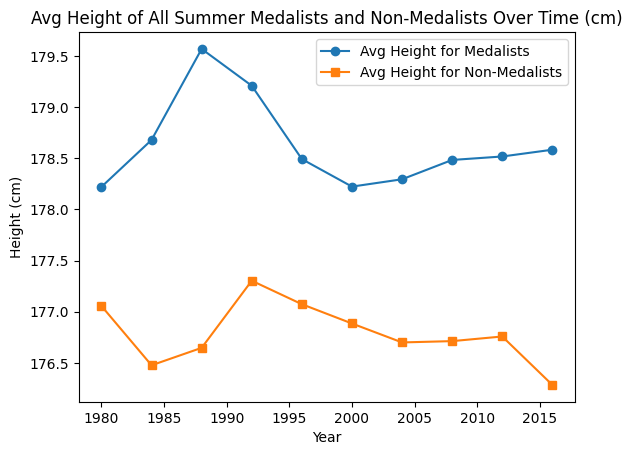

In [45]:
as_yearly_avg_height_medalists = as_medalists.groupby('Year')[['Height']].mean().reset_index()
as_yearly_avg_height_non_medalists = as_non_medalists.groupby('Year')[['Height']].mean().reset_index()

plt.plot(as_yearly_avg_height_medalists['Year'], as_yearly_avg_height_medalists['Height'], label = 'Avg Height for Medalists', marker = 'o')
plt.plot(as_yearly_avg_height_non_medalists['Year'], as_yearly_avg_height_non_medalists['Height'], label = 'Avg Height for Non-Medalists', marker = 's')

plt.title('Avg Height of All Summer Medalists and Non-Medalists Over Time (cm)')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.legend()
plt.show()

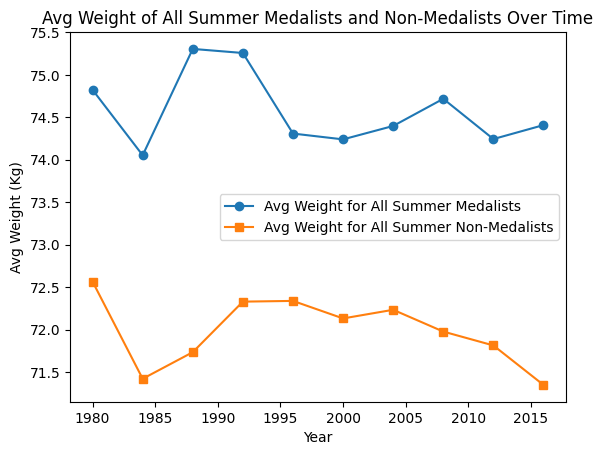

In [46]:
as_yearly_avg_weight_medalists = as_medalists.groupby('Year')[['Weight']].mean().reset_index()
as_yearly_avg_weight_non_medalists = as_non_medalists.groupby('Year')[['Weight']].mean().reset_index()

plt.plot(as_yearly_avg_weight_medalists['Year'], as_yearly_avg_weight_medalists['Weight'], label = 'Avg Weight for All Summer Medalists', marker='o')
plt.plot(as_yearly_avg_weight_non_medalists['Year'], as_yearly_avg_weight_non_medalists['Weight'], label = "Avg Weight for All Summer Non-Medalists", marker = 's')

plt.title('Avg Weight of All Summer Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Weight (Kg)')
plt.legend()
plt.show()

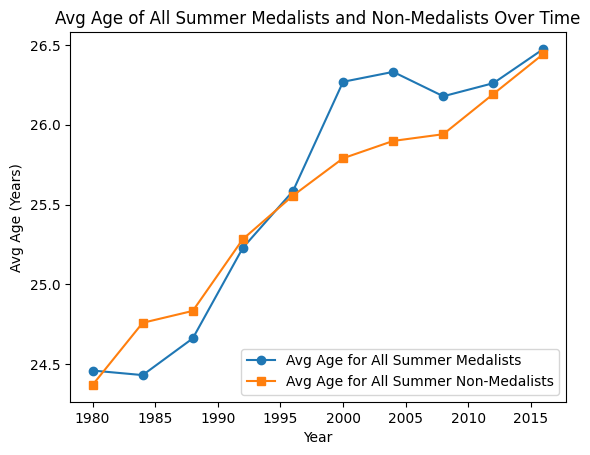

In [49]:
as_yearly_avg_age_medalists = as_medalists.groupby('Year')[['Age']].mean().reset_index()
as_yearly_avg_age_non_medalists = as_non_medalists.groupby('Year')[['Age']].mean().reset_index()

plt.plot(as_yearly_avg_age_medalists['Year'], as_yearly_avg_age_medalists['Age'], label = 'Avg Age for All Summer Medalists', marker='o')
plt.plot(as_yearly_avg_age_non_medalists['Year'], as_yearly_avg_age_non_medalists['Age'], label = "Avg Age for All Summer Non-Medalists", marker = 's')

plt.title('Avg Age of All Summer Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Age (Years)')
plt.legend()
plt.show()

### Feature Prep & Prediction

### Unscaled Data Test

### Standardized Data Test

### Normalized Data Test

### Analysis

# **Below: Visualization and Analysis of Recent Data For Males**

## **All Seasons**

In [ ]:
male_df = all_df[all_df['Sex']== 'M']
male_df.reset_index(drop=True, inplace=True)
male_df.head()

### Visualizations

### Feature Prep & Predictions

### Unscaled Data Test

### Standardized Data Test

### Normalized Data Test

### Analysis

## **Winter Season**

### Visualizations

In [26]:
male_winter_df = all_df[all_df['Season Encoded'] == 0]
male_winter_df = male_winter_df[male_winter_df['Sex'] == 'M']
male_winter_df.reset_index(drop=True, inplace=True)
male_winter_df.head()

,ID,Sex,Age,Height,Weight,Year,Sport,Medalist,Season Encoded
0,6,M,31.0,188.0,75.0,1992,Cross Country Skiing,0,0
1,6,M,33.0,188.0,75.0,1994,Cross Country Skiing,0,0
2,7,M,31.0,183.0,72.0,1992,Cross Country Skiing,0,0
3,7,M,33.0,183.0,72.0,1994,Cross Country Skiing,0,0
4,9,M,26.0,186.0,96.0,2002,Ice Hockey,0,0


In [ ]:
mw_grouped_height = male_winter_df.groupby('Sport')[['Height']].describe()
mw_grouped_height

In [ ]:
mw_grouped_weight = male_winter_df.groupby('Sport')[['Weight']].describe()
mw_grouped_weight

In [ ]:
mw_grouped_age = male_winter_df.groupby('Sport')[['Age']].describe()
mw_grouped_age

In [ ]:
mw_medalists_df = male_winter_df[male_winter_df['Medalist'] == 1]
mw_non_medalists_df = male_winter_df[male_winter_df['Medalist'] == 0]

In [ ]:
sns.pairplot(mw_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Male Winter Season Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
mw_traits = mw_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = mw_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Male Physical Traits for Medalists")
plt.tight_layout()

In [ ]:
sns.pairplot(mw_non_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Male Winter Season Non-Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
mw_traits2 = mw_non_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = mw_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Male Physical Traits for Non-Medalists")
plt.tight_layout()
plt.show()

### Feature Prep & Predictions

In [27]:
mw_features = male_winter_df[['Height', 'Age', 'Weight']]
mw_label = male_winter_df['Medalist']

In [28]:
X_train_mw, X_test_mw, y_train_mw, y_test_mw = train_test_split(mw_features, mw_label, test_size=0.2, random_state=42)

In [29]:
#create a standardized version of the training and testing data
std_scaler = StandardScaler()
X_train_mw_std = std_scaler.fit_transform(X_train_mw)
X_test__mw_std = std_scaler.transform(X_test_mw)

In [30]:
#create a normalized version of the training and testing data
norm_scaler = MinMaxScaler()
X_train_mw_norm = norm_scaler.fit_transform(X_train_mw)
X_test_mw_norm = norm_scaler.transform(X_test_mw)

### Unscaled Training Data Test

In [ ]:
#test on unscaled training data
model_unscaled_mw = KNeighborsClassifier(n_neighbors=5)
model_unscaled_mw.fit(X_train_mw, y_train_mw)
pred_unscaled_mw = model_unscaled_mw.predict(X_test_mw)
print(accuracy_score(y_test_mw, pred_unscaled_mw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mw, pred_unscaled_mw, display_labels = model_unscaled_mw.classes_)
plt.show()

### Standardized Data Training Test

In [ ]:
model_std_mw = KNeighborsClassifier(n_neighbors=5)
model_std_mw.fit(X_train_mw_std, y_train_mw)
pred_std_mw = model_std_mw.predict(X_test__mw_std)
print(accuracy_score(y_test_mw, pred_std_mw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mw, pred_std_mw, display_labels=model_std_mw.classes_)
plt.show()

### Normalized Data Training Test

In [ ]:
model_norm_mw = KNeighborsClassifier(n_neighbors = 5)
model_norm_mw.fit(X_train_mw_norm, y_train_mw)
pred_norm_mw = model_norm_mw.predict(X_test_mw_norm)
print(accuracy_score(y_test_mw, pred_norm_mw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mw, pred_norm_mw, display_labels=model_norm_mw.classes_)
plt.show()

### Analysis

shjgfkjagdkjgbaerkjjlearbjerg

## **Summer Season**

### Visualizations

In [ ]:
male_summer_df = all_df[all_df['Season_Encoded'] == 1]
male_summer_df = male_summer_df[male_summer_df['Sex'] == 'M']
male_summer_df.reset_index(drop=True, inplace=True)
male_summer_df.head()

In [ ]:
ms_grouped_height = male_summer_df.groupby('Sport')[['Height']].describe()
ms_grouped_height

In [ ]:
ms_grouped_weight = male_summer_df.groupby('Sport')[['Weight']].describe()
ms_grouped_weight

In [ ]:
ms_grouped_age = male_summer_df.groupby('Sport')[['Weight']].describe()
ms_grouped_age

In [ ]:
ms_medalists_df = male_summer_df[male_summer_df['Medalist'] == 1]
ms_non_medalists_df = male_summer_df[male_summer_df['Medalist'] == 0]

In [ ]:
sns.pairplot(ms_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Male Summer Season Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
ms_traits = ms_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = ms_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Male Phyisical Traits for Medalists")
plt.tight_layout()

In [ ]:
sns.pairplot(ms_non_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Male Summer Season Non-Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
ms_traits2 = ms_non_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = ms_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Male Physical Traits for Non-Medalists")
plt.tight_layout()

### Feature Prep + Predictions

In [ ]:
ms_features = male_summer_df[['Height', 'Age', 'Weight']]
ms_label = male_summer_df['Medalist']

In [ ]:
X_test_ms, X_train_ms, y_test_ms, y_train_ms = train_test_split(ms_features, ms_label, test_size=0.2, random_state=42)

In [ ]:
#Create standardized version of training and testing data
std_scaler = StandardScaler()
X_train_ms_std = std_scaler.fit_transform(X_train_ms)
X_test_ms_std = std_scaler.transform(X_test_ms)

In [ ]:
# Create a normalized version of training and testing data
norm_scaler = MinMaxScaler()
X_train_ms_norm = norm_scaler.fit_transform(X_train_ms)
X_test_ms_norm = norm_scaler.transform(X_test_ms)

### Unscaled Data Training Test

In [ ]:
model_unscaled_ms = KNeighborsClassifier(n_neighbors=5)
model_unscaled_ms.fit(X_train_ms, y_train_ms)
pred_unscaled_ms = model_unscaled_ms.predict(X_test_ms)
print(accuracy_score(y_test_ms, pred_unscaled_ms))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_ms, pred_unscaled_ms, display_labels = model_unscaled_ms.classes_)
plt.show()

### Standardized Data Training Test

In [ ]:
model_std_ms = KNeighborsClassifier(n_neighbors=5)
model_std_ms.fit(X_train_ms_std, y_train_ms)
pred_std_ms = model_std_ms.predict(X_test_ms_std)
print(accuracy_score(y_test_ms, pred_std_ms))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_ms, pred_std_ms, display_labels=model_std_ms.classes_)
plt.show()

### Normalized Data Training Test

In [ ]:
model_norm_ms = KNeighborsClassifier(n_neighbors=5)
model_norm_ms.fit(X_train_ms_norm, y_train_ms)
pred_norm_ms = model_norm_ms.predict(X_test_ms_norm)
print(accuracy_score(y_test_ms, pred_norm_ms))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_ms, pred_norm_ms, display_labels=model_norm_ms.classes_)
plt.show()

### Analysis

# **Below: Visualization and Analysis of Recent Data for Females**

## All Seasons

In [ ]:
female_df = all_df[all_df['Sex'] == 'F']
female_df.reset_index(drop=True, inplace=True)
female_df.head()

## **Winter Season**

In [ ]:
female_winter_df = all_df[all_df['Season_Encoded'] == 0]
female_winter_df = female_winter_df[female_winter_df['Sex'] == 'F']
female_winter_df.reset_index(drop=True, inplace=True)
female_winter_df.head()

### Visualizations

In [ ]:
fw_grouped_height = female_winter_df.groupby('Sport')[['Height']].describe()
fw_grouped_height

In [ ]:
fw_grouped_weight = female_winter_df.groupby('Sport')[['Weight']].describe()
fw_grouped_weight

In [ ]:
fw_grouped_age = female_winter_df.groupby('Sport')[['Age']].describe()
fw_grouped_age

In [ ]:
fw_medalists_df = female_winter_df[female_winter_df['Medalist'] == 1]
fw_non_medalists_df = female_winter_df[female_winter_df['Medalist'] == 0]

In [ ]:
sns.pairplot(fw_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Female Winter Season Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
fw_traits = fw_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = fw_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Female Physical Traits for Medalists")
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(fw_non_medalists_df[['Height', 'Weight', 'Age']], diag_kind = 'hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Female Winter Season Non-Medalists")
plt.tight_layout()
plt.show()

In [ ]:
# Select numercial columns
fw_traits2 = fw_non_medalists_df[['Height', 'Weight', 'Age']]

# Compute Correlation Matrix
corr_matrix = fw_traits2.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot= True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title("Correlation Matrix of Female Physical Traits for Non-Medalists")
plt.tight_layout()
plt.show()

### Feature Prep & Predictions

In [ ]:
fw_features = female_winter_df[['Height', 'Age', 'Weight']]
fw_label = female_winter_df['Medalist']

In [ ]:
X_train_fw, X_test_fw, y_train_fw, y_test_fw = train_test_split(fw_features, fw_label, test_size=0.2, random_state=42)

In [ ]:
# Standardized Training Data
std_scaler = StandardScaler()
X_train_fw_std = std_scaler.fit_transform(X_train_fw)
X_test_fw_std = std_scaler.transform(X_test_fw)

In [ ]:
# Normalized Training Data
norm_scaler = MinMaxScaler()
X_train_fw_norm = norm_scaler.fit_transform(X_train_fw)
X_test_fw_norm = norm_scaler.transform(X_test_fw)

### Unscaled Data Test

In [ ]:
model_unscaled_fw = KNeighborsClassifier(n_neighbors = 5)
model_unscaled_fw.fit(X_train_fw, y_train_fw)
pred_unscaled_fw = model_unscaled_fw.predict(X_test_fw)
print(accuracy_score(y_test_fw, pred_unscaled_fw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_fw, pred_unscaled_fw, display_labels = model_unscaled_fw.classes_)
plt.show()

### Standardized Data Test

In [ ]:
model_std_fw = KNeighborsClassifier(n_neighbors = 5)
model_std_fw.fit(X_train_fw_std, y_train_fw)
pred_std_fw = model_std_fw.predict(X_test_fw_std)
print(accuracy_score(y_test_fw, pred_std_fw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_fw, pred_std_fw, display_labels=model_std_fw.classes_)
plt.show()

### Normalized Data Test

In [ ]:
model_norm_fw = KNeighborsClassifier(n_neighbors = 5)
model_norm_fw.fit(X_train_fw_norm, y_train_fw)
pred_norm_fw = model_norm_fw.predict(X_test_fw_norm)
print(accuracy_score(y_test_fw, pred_norm_fw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_fw, pred_norm_fw, display_labels = model_norm_fw.classes_)
plt.show()

### Analysis

## **Summer Season**

In [ ]:
female_summer_df = all_df[all_df['Season_Encoded'] == 1]
female_summer_df = female_summer_df[female_summer_df['Sex'] == 'F']
female_summer_df.reset_index(drop=True, inplace=True)
female_summer_df.head()

### Visualizations

In [ ]:
fs_grouped_height = female_summer_df.groupby('Sport')[['Height']].describe()
fs_grouped_height

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Height', data = female_summer_df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
fs_grouped_weight = female_summer_df.groupby('Sport')[['Weight']].describe()
fs_grouped_weight

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Weight', data= female_summer_df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
fs_grouped_age = female_summer_df.groupby('Sport')[['Age']].describe()
fs_grouped_age

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Age', data = female_summer_df)
plt.xticks(rotation  = 90)
plt.show()

### Feature Prep & Predictions

In [ ]:
fs_features = female_summer_df[['Height', 'Age', 'Weight']]
fs_label = female_summer_df['Medalist']

### Unscaled Data Test

### Standardized Data Test

### Normalized Data Test

### Analysis